In [81]:
from torchvision import transforms
from torchvision import datasets
import torch
from libpysal.weights import lat2W
import scipy.sparse as scs
import numpy as np
from custom_data import  SplitPatches, CellDataset, GraphDataModule, LaplacianGridEmbedding
from custom_data import (
    SIZE,
    PATCH_SIZE
)

train_transform = transforms.Compose([
                                    transforms.Resize((SIZE, SIZE)),
                                    SplitPatches(PATCH_SIZE)
                                     ])

In [82]:
mnist = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=transforms.ToTensor(),
)

In [96]:
graph_kwargs_grid = {
        "grid_size": 6,
        "imgs": mnist.data.unsqueeze(1),
        "targets": mnist.targets,
        "img_transform": train_transform,
        "channels": [0]
}


graph_family_binomial = "binomial"
graph_family_grid = "grid"


datamodule = GraphDataModule(
        graph_family=graph_family_grid,
        train_graph_kwargs=graph_kwargs_grid, 
        val_graph_kwargs=None,
        batch_size=32,
        num_workers=1,
        samples_per_epoch=1000,
        distributed_sampler=None
    )

In [97]:
train = datamodule.train_dataloader()

In [98]:
vals = [el for el in train]

In [99]:
vals

[DenseGraphBatch(edge_features=[0], mask=[32, 36], node_features=[32, 36, 16], properties=[32], y=[32]),
 DenseGraphBatch(edge_features=[0], mask=[32, 36], node_features=[32, 36, 16], properties=[32], y=[32]),
 DenseGraphBatch(edge_features=[0], mask=[32, 36], node_features=[32, 36, 16], properties=[32], y=[32]),
 DenseGraphBatch(edge_features=[0], mask=[32, 36], node_features=[32, 36, 16], properties=[32], y=[32]),
 DenseGraphBatch(edge_features=[0], mask=[32, 36], node_features=[32, 36, 16], properties=[32], y=[32]),
 DenseGraphBatch(edge_features=[0], mask=[32, 36], node_features=[32, 36, 16], properties=[32], y=[32]),
 DenseGraphBatch(edge_features=[0], mask=[32, 36], node_features=[32, 36, 16], properties=[32], y=[32]),
 DenseGraphBatch(edge_features=[0], mask=[32, 36], node_features=[32, 36, 16], properties=[32], y=[32]),
 DenseGraphBatch(edge_features=[0], mask=[32, 36], node_features=[32, 36, 16], properties=[32], y=[32]),
 DenseGraphBatch(edge_features=[0], mask=[32, 36], node

In [63]:
vals[0].node_features

tensor([[[  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
         [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
         [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
         ...,
         [  0.3640,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
         [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
         [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000]],

        [[  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
         [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
         [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
         ...,
         [  1.2243,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
         [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
         [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000]],

        [[  0.0000,   0.0000,   0.0000,  ...

In [58]:
data = datamodule.train_dataloader()

In [5]:
batches = [el for el in data]

In [65]:
a = batches[0]

tensor(253.)

In [11]:
mask = batches[0].mask
adj_mask = mask.unsqueeze(1) * mask.unsqueeze(2)

# edges_true = (graph_true.edge_features[adj_mask][:, 1] == 1).float()
# edges_pred = graph_pred.edge_features[adj_mask][:, 1]
# edge_loss = self.edge_loss(
#     input=edges_pred,
#     target=edges_true
# )

In [34]:
from dataclasses import dataclass, asdict
import os

DEFAULT_SAVE_DIR = os.path.join(os.getcwd())

@dataclass
class Params:
    id: int = 0
    num_epochs: int = 10
    num_eval_samples: int = 8192
    eval_freq: int = 1000
    save_dir: str = DEFAULT_SAVE_DIR
    precision: int = 32
    progress_bar: bool = True
    test: bool = False
    resume_ckpt: str = ""
    batch_size: int = 32
    lr: float = 0.0005
    kld_loss_scale: float = 0.001
    perm_loss_scale: float = 0.5
    property_loss_scale: float = 0.1
    vae: bool = True
    num_node_features: int = 16
    num_edge_features: int = 0
    emb_dim: int = 16
    grid_size: int = 6
    graph_encoder_hidden_dim: int = 32
    graph_encoder_k_dim: int = 8
    graph_encoder_v_dim: int = 8
    graph_encoder_num_heads: int = 2
    graph_encoder_ppf_hidden_dim: int = 128
    graph_encoder_num_layers: int = 4
    graph_decoder_hidden_dim: int = 32
    graph_decoder_k_dim: int = 8
    graph_decoder_v_dim: int = 8
    graph_decoder_num_heads: int = 2
    graph_decoder_ppf_hidden_dim: int = 128
    graph_decoder_pos_emb_dim: int = 8
    graph_decoder_num_layers: int = 4
    property_predictor_hidden_dim: int = 32
    num_properties: int = 1
    num_workers: int = 1
    shuffle: int = 1
    graph_family: str = "grid"
    n_min: int = 12
    n_max: int = 20
    p_min: float = 0.4
    p_max: float = 0.6
    m_min: int = 1
    m_max: int = 5

# Example usage
hparams = Params()

# Convert to dictionary
params_dict = asdict(hparams)

print(params_dict)


{'id': 0, 'num_epochs': 10, 'num_eval_samples': 8192, 'eval_freq': 1000, 'save_dir': '/Users/tomeknocon/MIM/Master_Thesis/PIGVAE/pigvae/synthetic_graphs', 'precision': 32, 'progress_bar': True, 'test': False, 'resume_ckpt': '', 'batch_size': 32, 'lr': 0.0005, 'kld_loss_scale': 0.001, 'perm_loss_scale': 0.5, 'property_loss_scale': 0.1, 'vae': True, 'num_node_features': 16, 'num_edge_features': 0, 'emb_dim': 16, 'grid_size': 6, 'graph_encoder_hidden_dim': 32, 'graph_encoder_k_dim': 8, 'graph_encoder_v_dim': 8, 'graph_encoder_num_heads': 2, 'graph_encoder_ppf_hidden_dim': 128, 'graph_encoder_num_layers': 4, 'graph_decoder_hidden_dim': 32, 'graph_decoder_k_dim': 8, 'graph_decoder_v_dim': 8, 'graph_decoder_num_heads': 2, 'graph_decoder_ppf_hidden_dim': 128, 'graph_decoder_pos_emb_dim': 8, 'graph_decoder_num_layers': 4, 'property_predictor_hidden_dim': 32, 'num_properties': 1, 'num_workers': 1, 'shuffle': 1, 'graph_family': 'grid', 'n_min': 12, 'n_max': 20, 'p_min': 0.4, 'p_max': 0.6, 'm_min

In [250]:
from dataclasses import dataclass, asdict
import os

DEFAULT_SAVE_DIR = os.path.join(os.getcwd())

@dataclass
class Params:
    id: int = 0
    num_epochs: int = 200
    num_eval_samples: int = 8192
    eval_freq: int = 1000
    save_dir: str = DEFAULT_SAVE_DIR
    precision: int = 32
    progress_bar: bool = True
    test: bool = False
    resume_ckpt: str = ""
    batch_size: int = 64
    lr: float = 0.01
    kld_loss_scale: float = 0.001
    perm_loss_scale: float = 0.5
    property_loss_scale: float = 0.1
    vae: bool = True
    num_node_features: int = 16
    num_edge_features: int = 0
    emb_dim: int = 16
    grid_size: int = 6
    graph_encoder_hidden_dim: int = 32
    graph_encoder_k_dim: int = 8
    graph_encoder_v_dim: int = 8
    graph_encoder_num_heads: int = 2
    graph_encoder_ppf_hidden_dim: int = 128
    graph_encoder_num_layers: int = 4
    graph_decoder_hidden_dim: int = 32
    graph_decoder_k_dim: int = 8
    graph_decoder_v_dim: int = 8
    graph_decoder_num_heads: int = 2
    graph_decoder_ppf_hidden_dim: int = 128
    graph_decoder_pos_emb_dim: int = 16
    graph_decoder_num_layers: int = 4
    property_predictor_hidden_dim: int = 32
    num_properties: int = 1
    num_workers: int = 1
    shuffle: int = 1
    graph_family: str = "grid"
    n_min: int = 12
    n_max: int = 20
    p_min: float = 0.4
    p_max: float = 0.6
    m_min: int = 1
    m_max: int = 5

# Example usage
hparams = Params()

# Convert to dictionary
params_dict = asdict(hparams)

print(params_dict)


{'id': 0, 'num_epochs': 200, 'num_eval_samples': 8192, 'eval_freq': 1000, 'save_dir': '/Users/tomeknocon/MIM/Master_Thesis/PIGVAE/pigvae/synthetic_graphs', 'precision': 32, 'progress_bar': True, 'test': False, 'resume_ckpt': '', 'batch_size': 64, 'lr': 0.01, 'kld_loss_scale': 0.001, 'perm_loss_scale': 0.5, 'property_loss_scale': 0.1, 'vae': True, 'num_node_features': 16, 'num_edge_features': 0, 'emb_dim': 16, 'grid_size': 6, 'graph_encoder_hidden_dim': 32, 'graph_encoder_k_dim': 8, 'graph_encoder_v_dim': 8, 'graph_encoder_num_heads': 2, 'graph_encoder_ppf_hidden_dim': 128, 'graph_encoder_num_layers': 4, 'graph_decoder_hidden_dim': 32, 'graph_decoder_k_dim': 8, 'graph_decoder_v_dim': 8, 'graph_decoder_num_heads': 2, 'graph_decoder_ppf_hidden_dim': 128, 'graph_decoder_pos_emb_dim': 16, 'graph_decoder_num_layers': 4, 'property_predictor_hidden_dim': 32, 'num_properties': 1, 'num_workers': 1, 'shuffle': 1, 'graph_family': 'grid', 'n_min': 12, 'n_max': 20, 'p_min': 0.4, 'p_max': 0.6, 'm_min

In [240]:
from pigvae.modules import GraphAE, GraphEncoder
model = GraphAE(params_dict)
encoder = GraphEncoder(params_dict)

/Users/tomeknocon/opt/anaconda3/envs/pigvae/lib/python3.8/site-packages/torch/nn/init.py:452: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


In [242]:
a = encoder(vals[0].node_features, vals[0].edge_features, vals[0].mask)

In [243]:
a[1].shape

torch.Size([32, 36, 32])

In [257]:
b = model(vals[0], True, 1)

TypeError: forward() takes 3 positional arguments but 4 were given

In [245]:
from pigvae.synthetic_graphs.metrics import Critic
from pigvae.trainer import PLGraphAE

In [251]:
model = PLGraphAE(params_dict, Critic)
model.load_state_dict(torch.load('run0/last-v42.ckpt')['state_dict'])
model.eval()

PLGraphAE(
  (graph_ae): GraphAE(
    (encoder): GraphEncoder(
      (posiotional_embedding): PositionalEncoding()
      (graph_transformer): Transformer(
        (self_attn_layers): ModuleList(
          (0-3): 4 x SelfAttention(
            (w_qs): Linear(in_features=32, out_features=16, bias=False)
            (w_ks): Linear(in_features=32, out_features=16, bias=False)
            (w_vs): Linear(in_features=32, out_features=16, bias=False)
            (fc): Linear(in_features=16, out_features=32, bias=False)
            (attention): ScaledDotProductWithEdgeAttention(
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (dropout): Dropout(p=0.1, inplace=False)
            (layer_norm): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
          )
        )
        (pff_layers): ModuleList(
          (0-3): 4 x PositionwiseFeedForward(
            (w_1): Linear(in_features=32, out_features=128, bias=True)
            (w_2): Linear(in_features=128, out_fe

In [262]:
b = model(vals[-2], True)

In [263]:
def restore_tensor(a, bs, c, h, w, patch_size):
    # Step 1: Reshape a to match the patch grid layout
    a = a.view(bs, -1, c, patch_size, patch_size)
    # a -> (B, num_patches, C, patch_size, patch_size)
    
    # Step 2: Reshape back to (B, C, H, W) by folding the patches
    # Calculate the grid size (L) which is the number of patches in each row and column
    grid_size = int(a.size(1) ** 0.5)  # Assumes square grid (height = width for the patches)
    
    # Unfold back into the original image size
    a = a.view(bs, grid_size, grid_size, c, patch_size, patch_size)
    # a -> (B, grid_size, grid_size, C, patch_size, patch_size)
    
    # Step 3: Permute and reshape to get back to the image format (B, C, H, W)
    x_reconstructed = a.permute(0, 3, 1, 4, 2, 5).contiguous()
    # x_reconstructed -> (B, C, grid_size, patch_size, grid_size, patch_size)
    
    x_reconstructed = x_reconstructed.view(bs, c, h, w)
    # x_reconstructed -> (B, C, H, W)
    
    return x_reconstructed

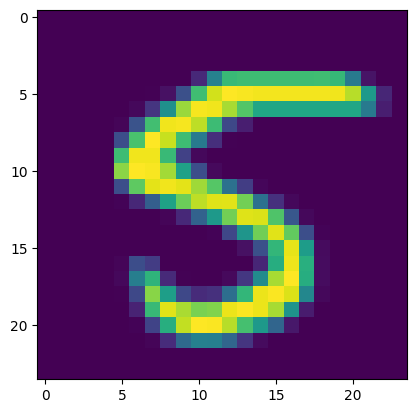

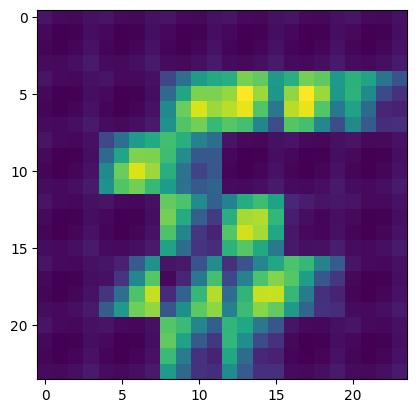

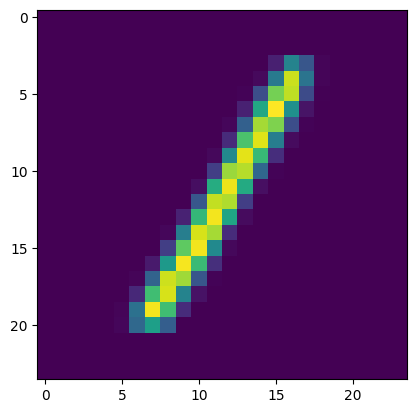

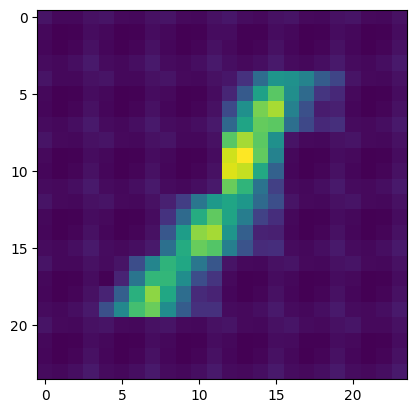

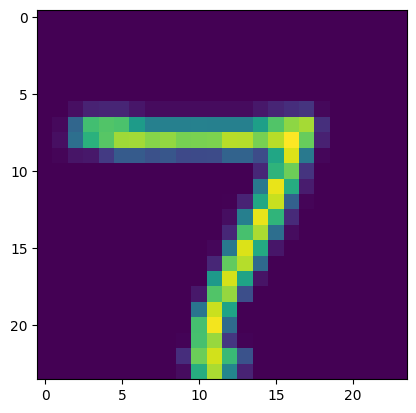

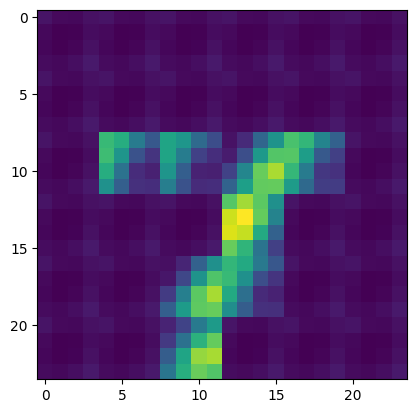

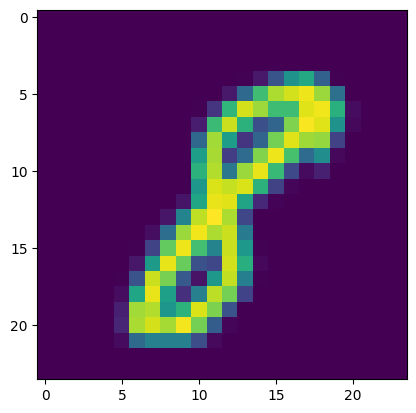

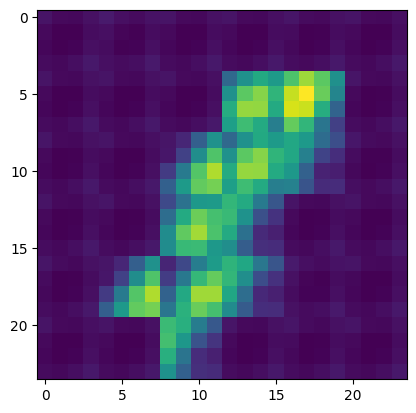

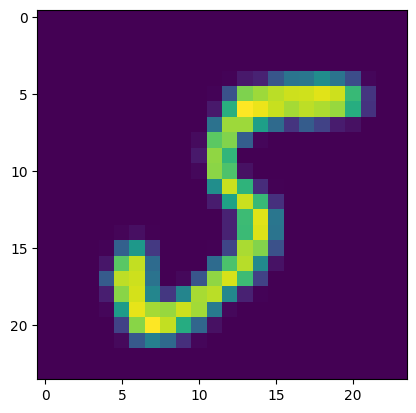

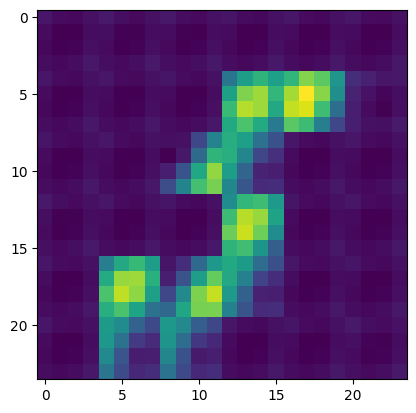

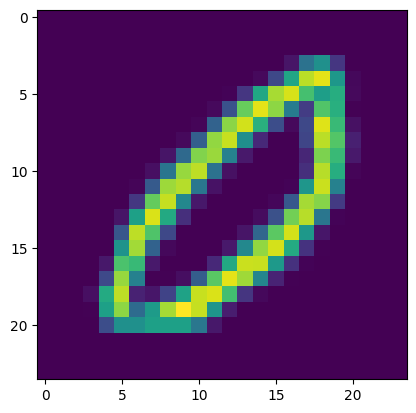

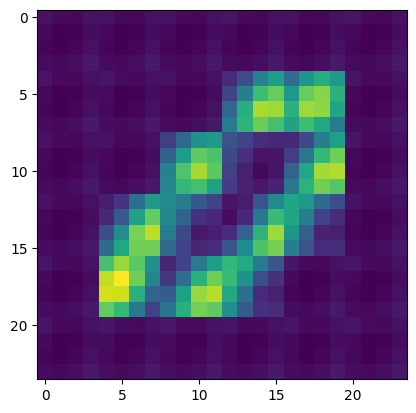

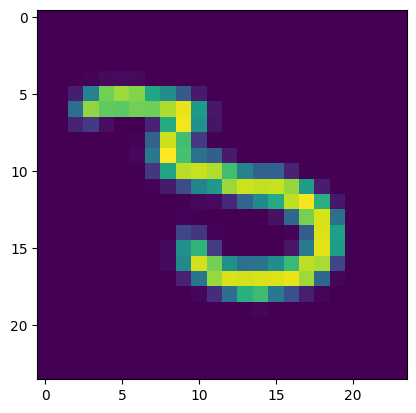

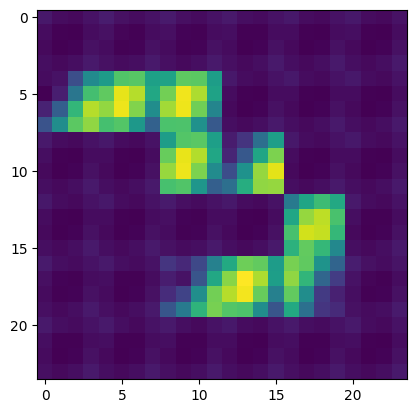

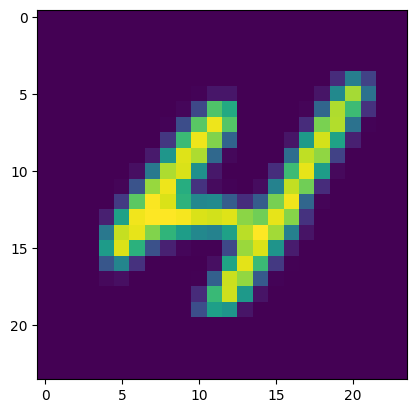

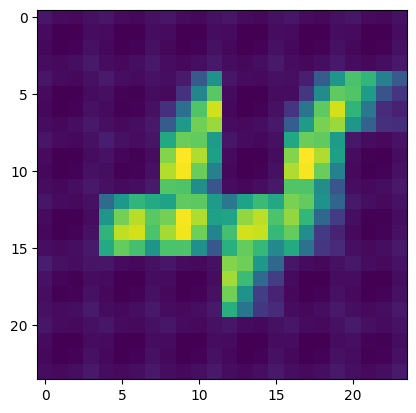

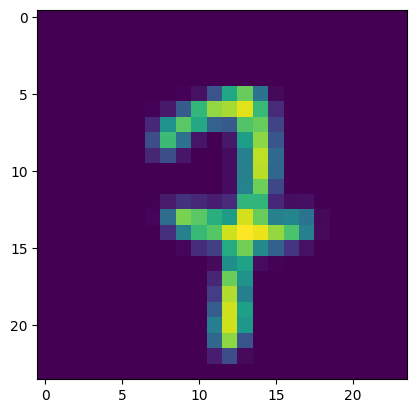

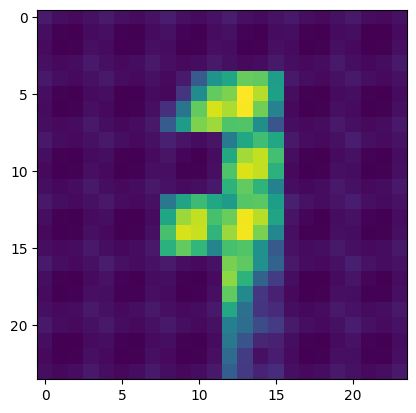

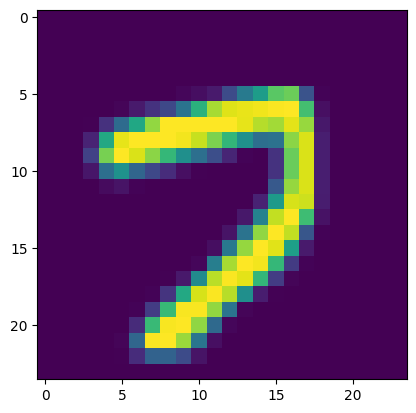

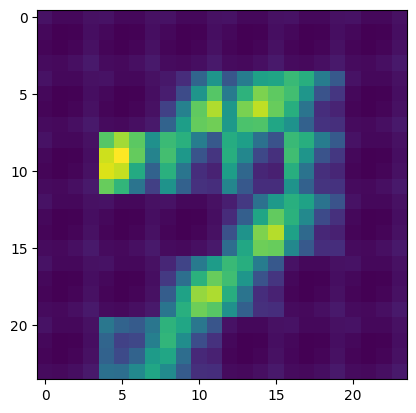

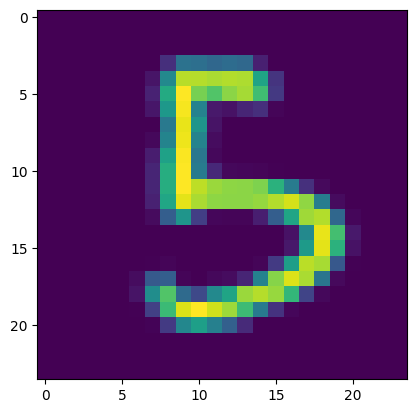

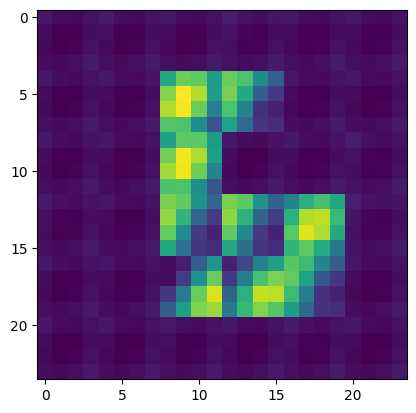

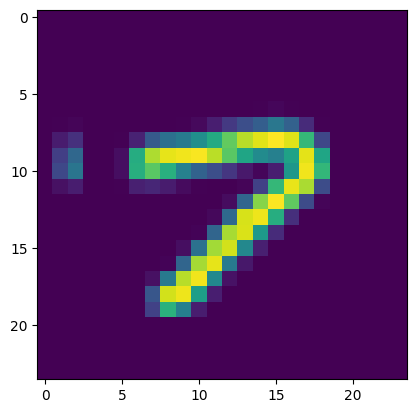

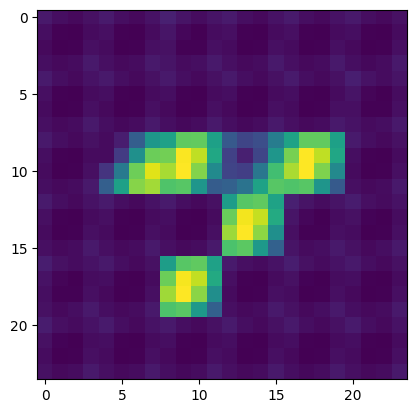

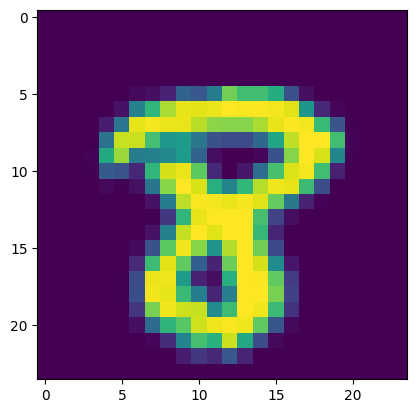

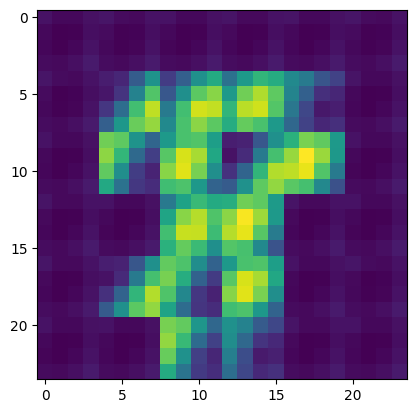

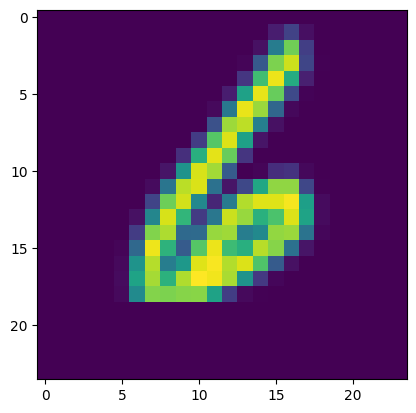

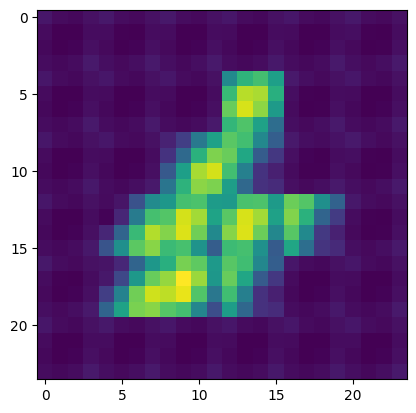

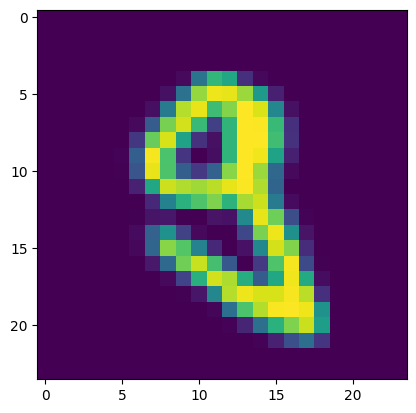

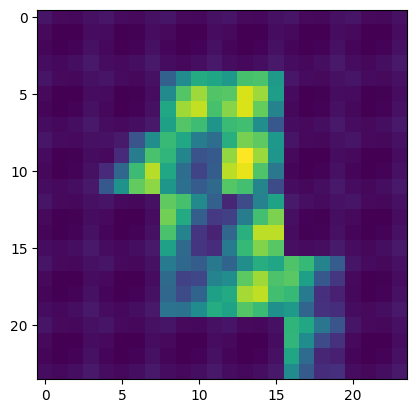

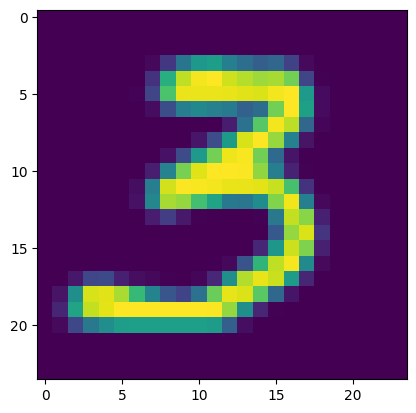

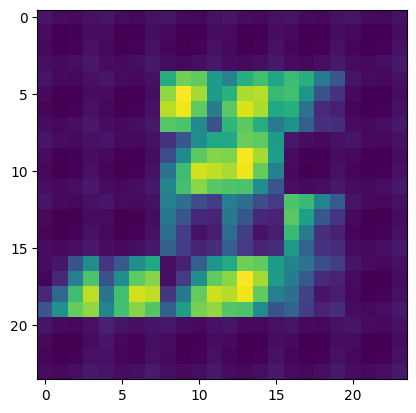

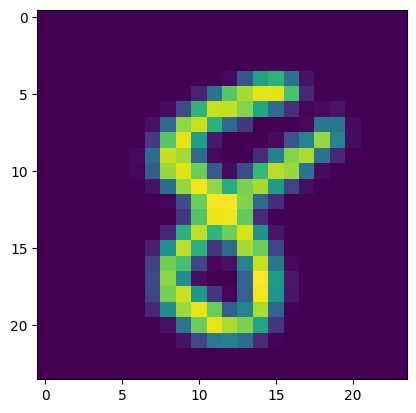

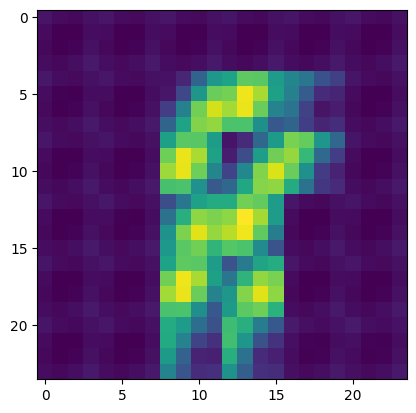

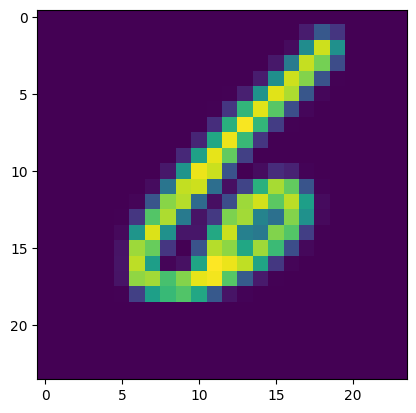

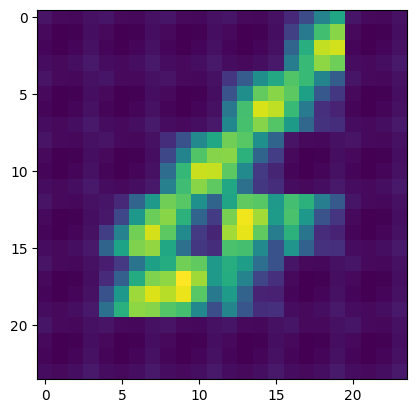

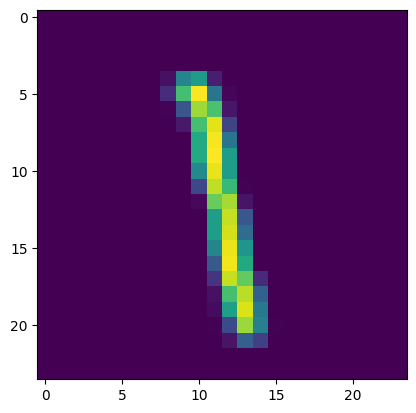

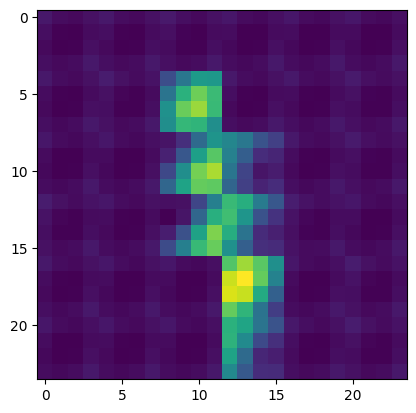

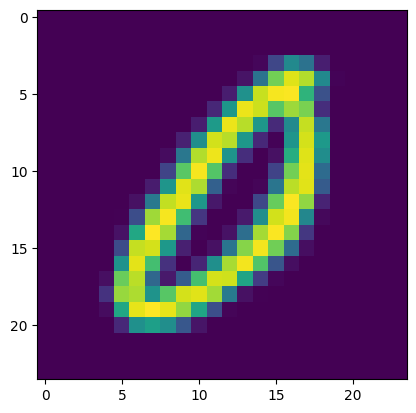

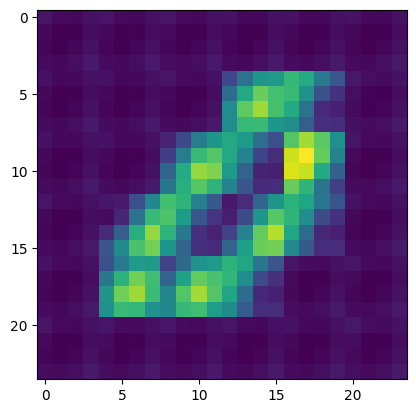

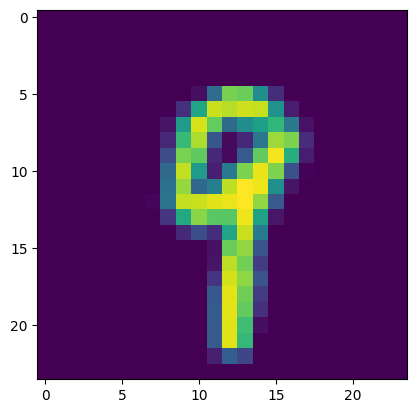

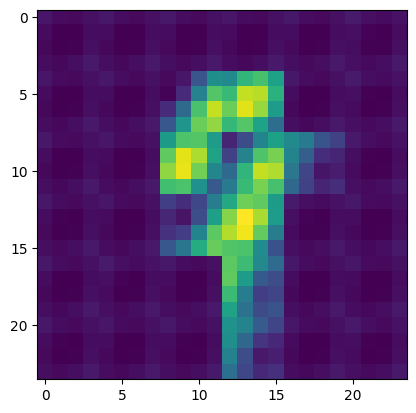

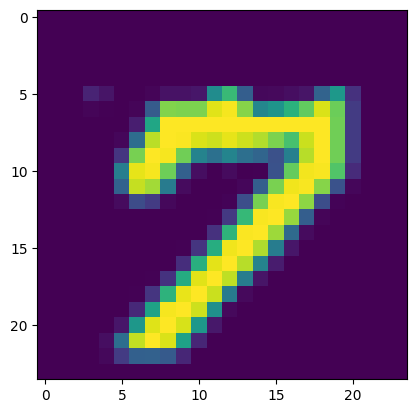

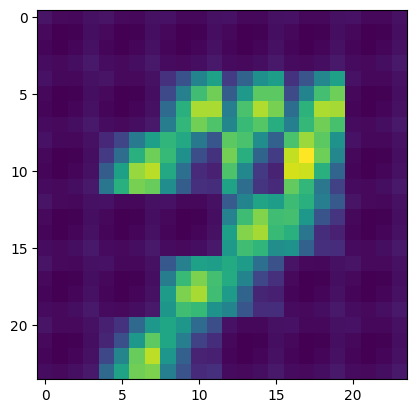

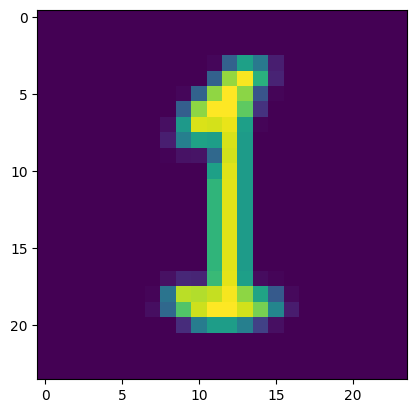

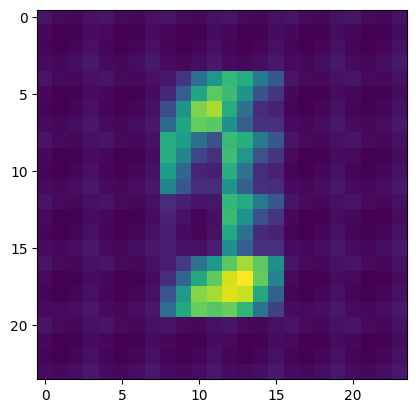

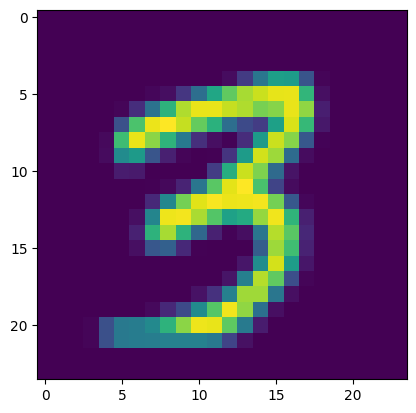

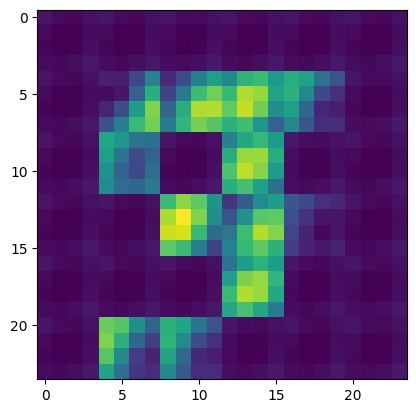

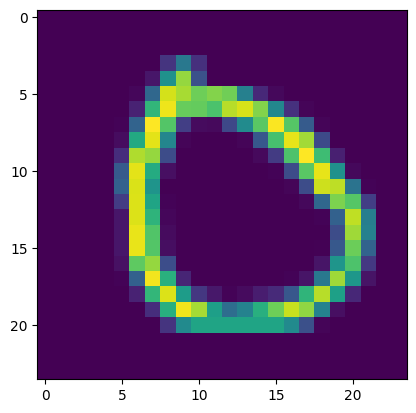

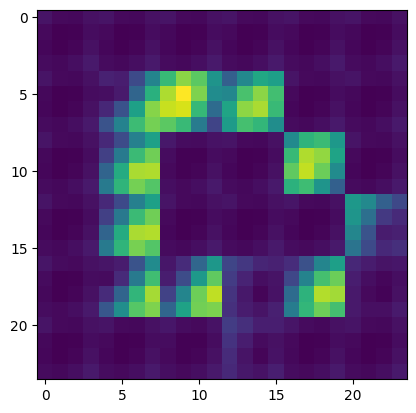

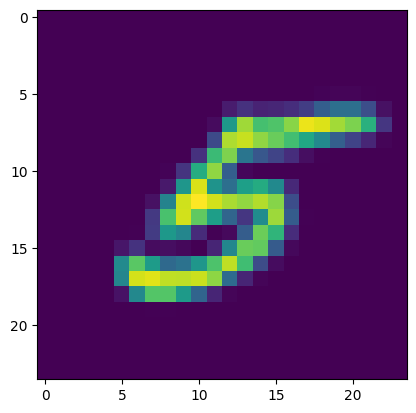

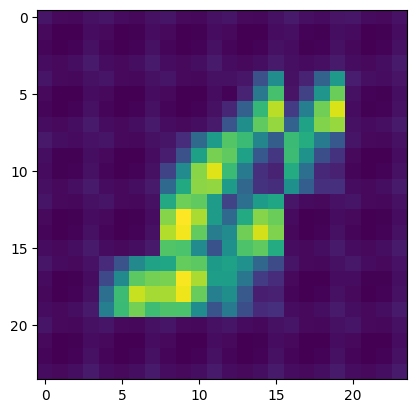

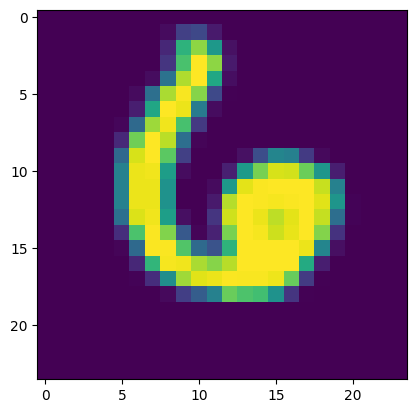

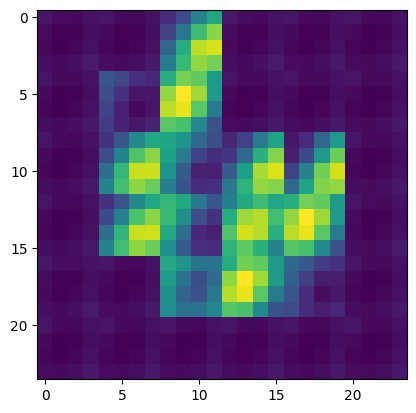

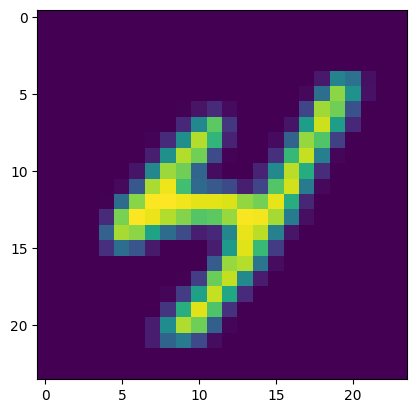

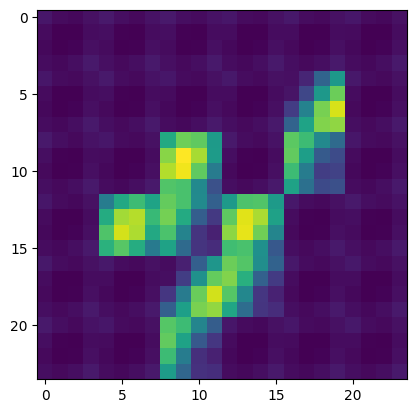

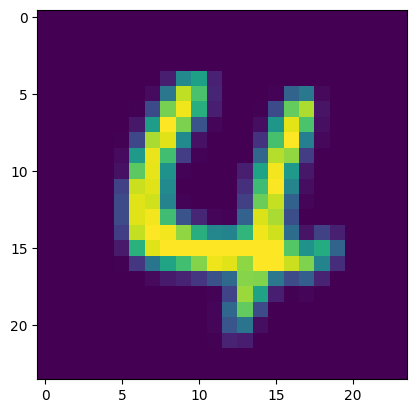

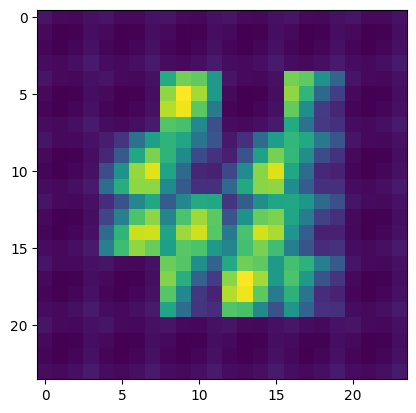

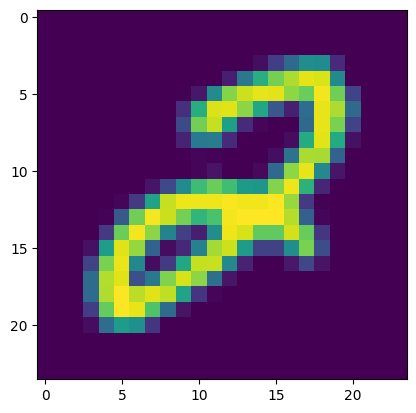

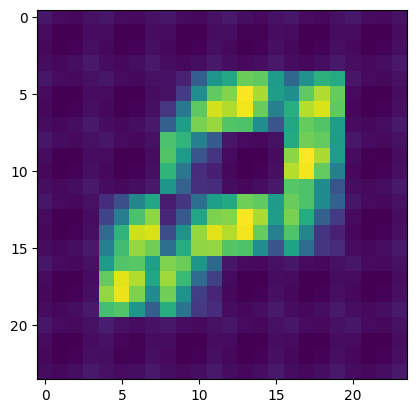

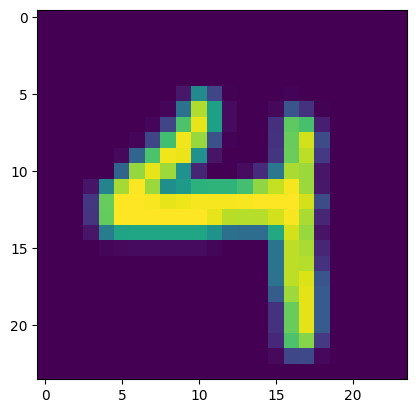

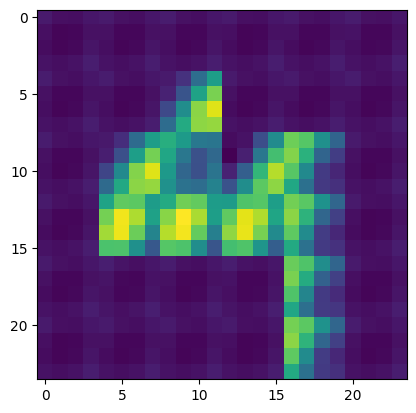

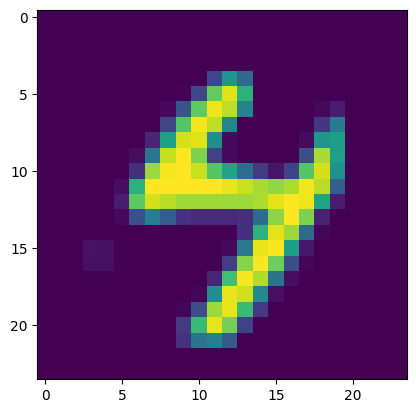

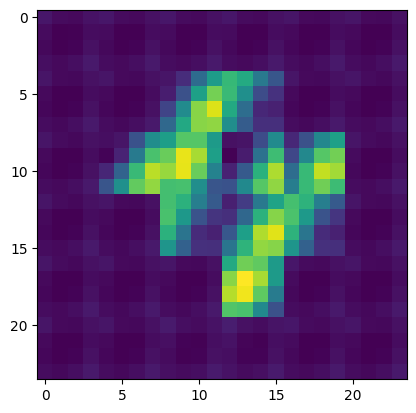

In [266]:
import matplotlib.pyplot as plt

for i in range(32):

    org = restore_tensor(vals[-2].node_features, 32, 1, 24, 24, 4)
    pred = restore_tensor(b[0].node_features, 32, 1, 24, 24, 4)

    plt.imshow(org[i].reshape(24, 24, 1).detach().numpy())
    plt.show()

    plt.imshow(pred[i].reshape(24, 24, 1).detach().numpy())
    plt.show()

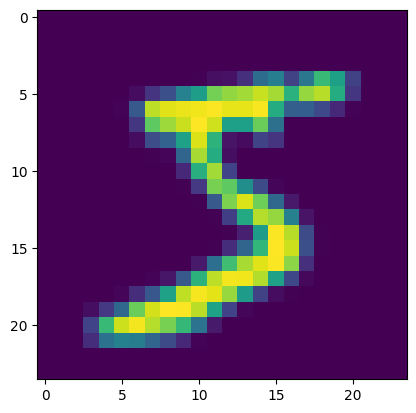

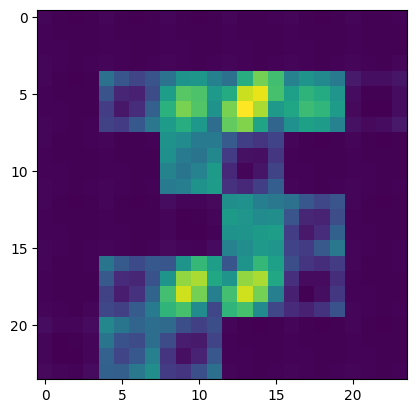

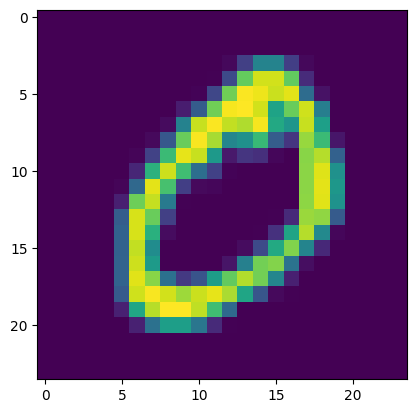

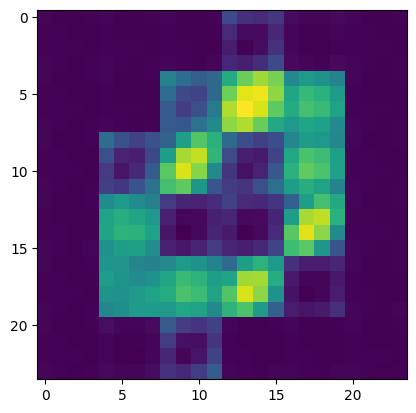

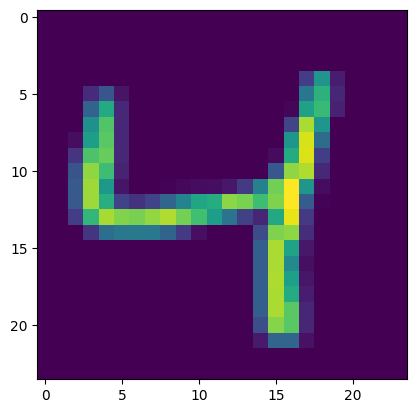

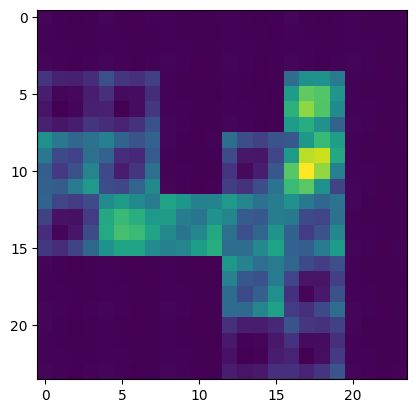

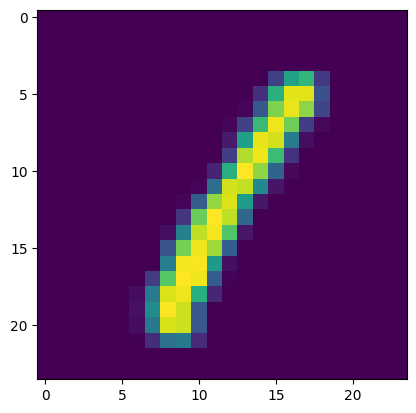

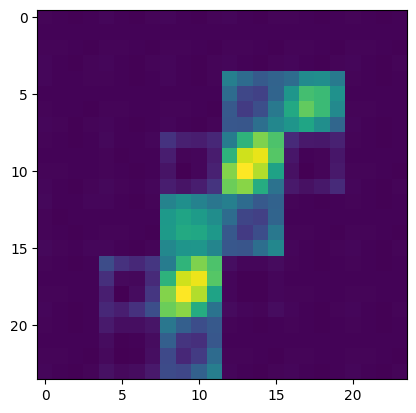

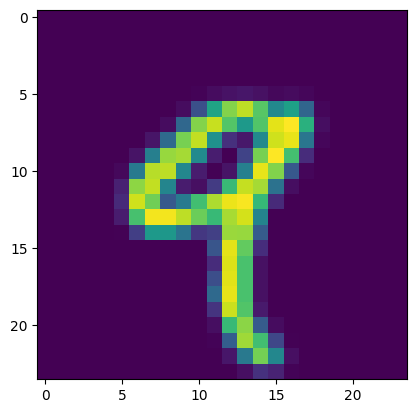

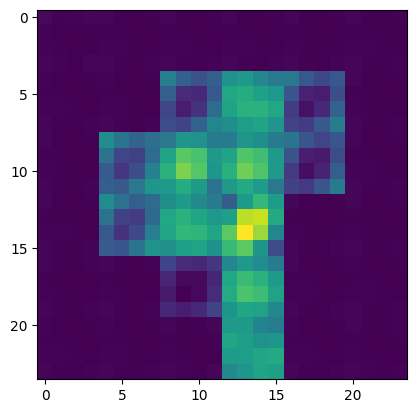

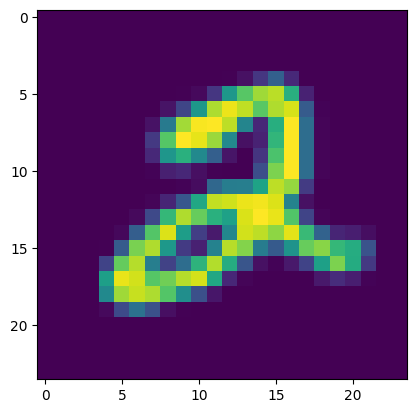

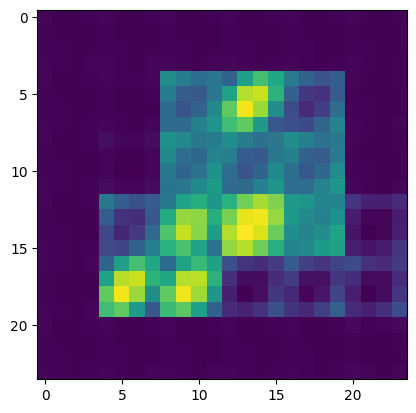

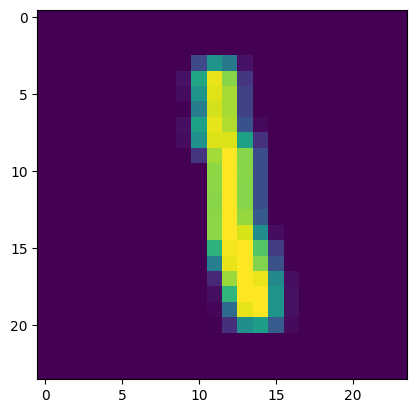

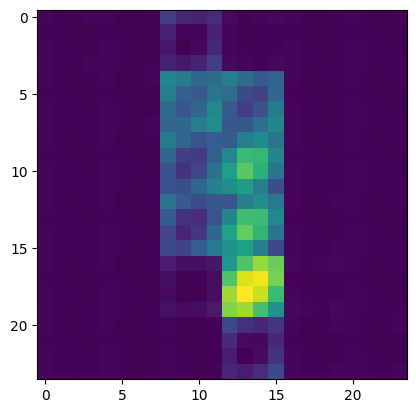

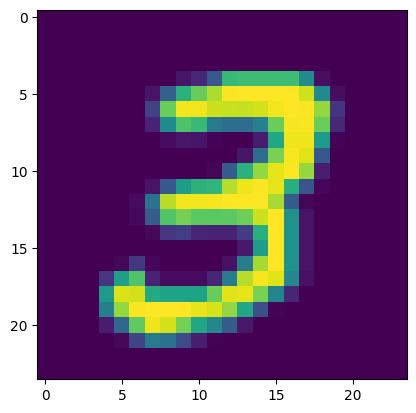

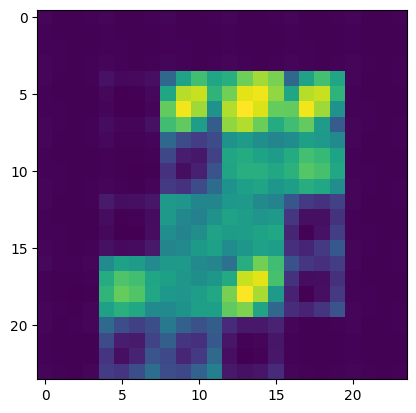

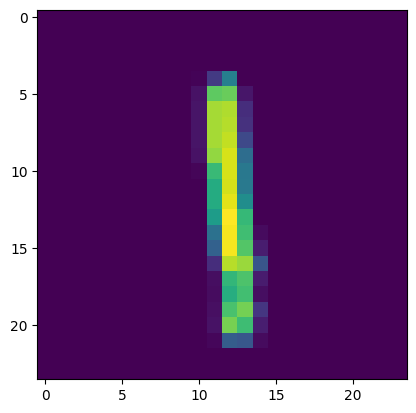

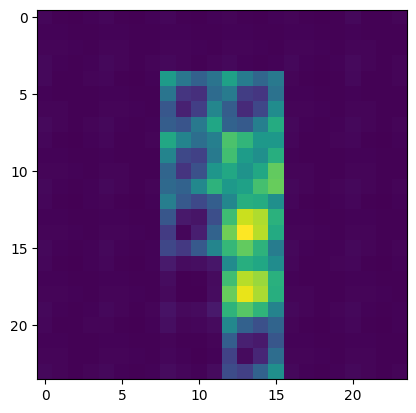

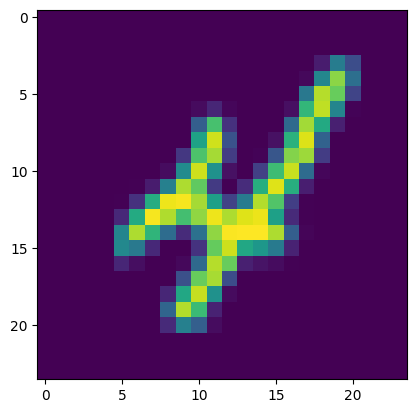

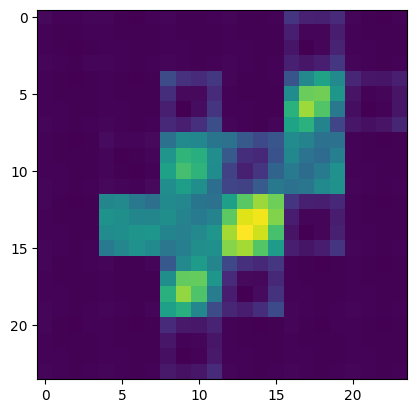

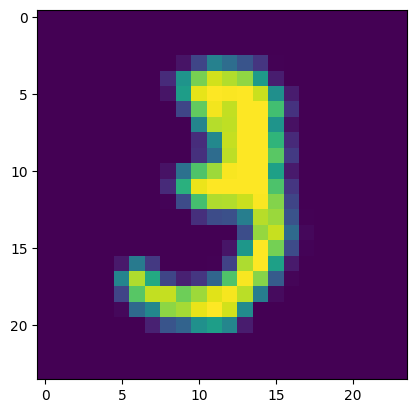

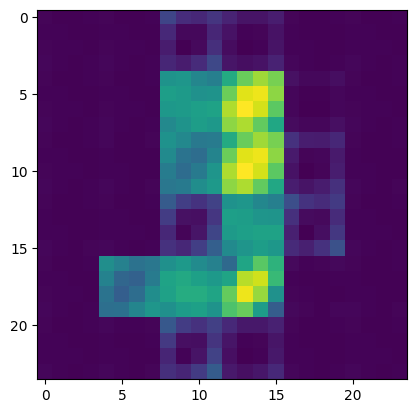

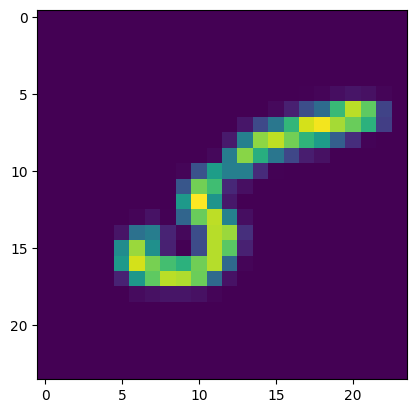

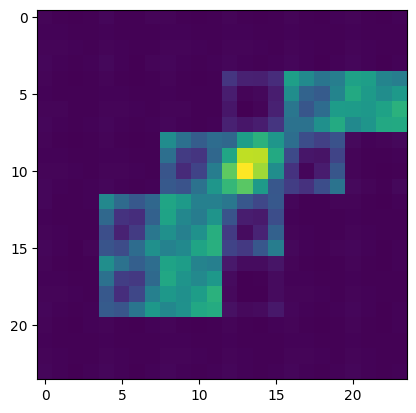

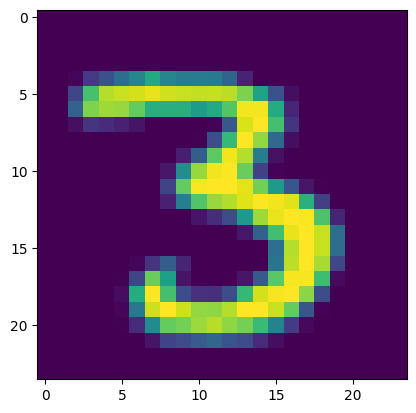

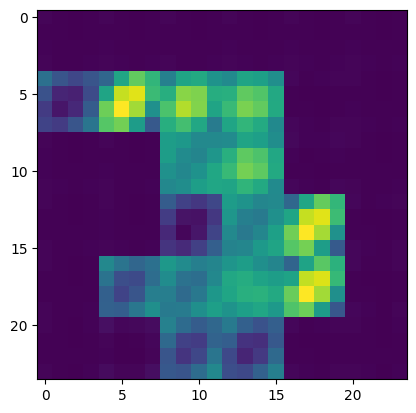

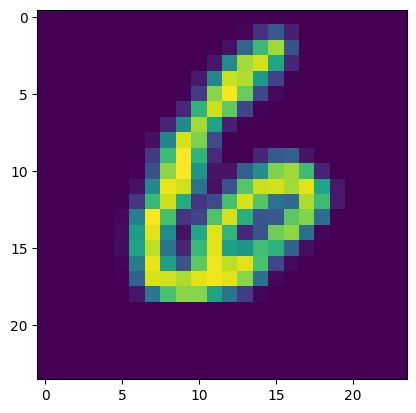

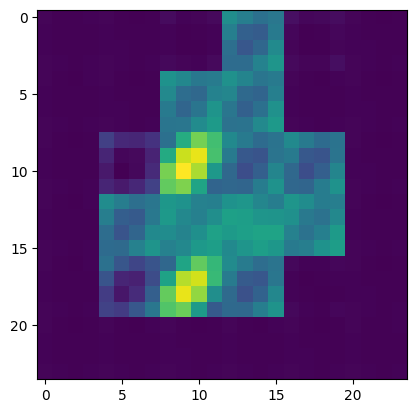

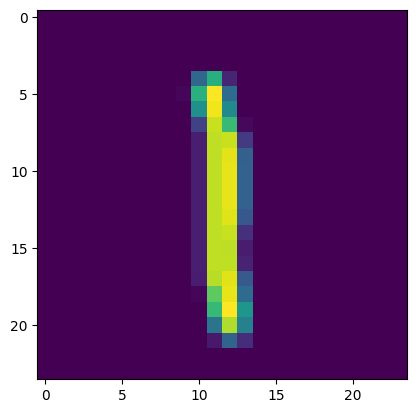

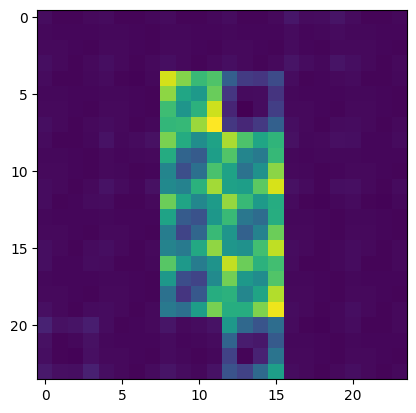

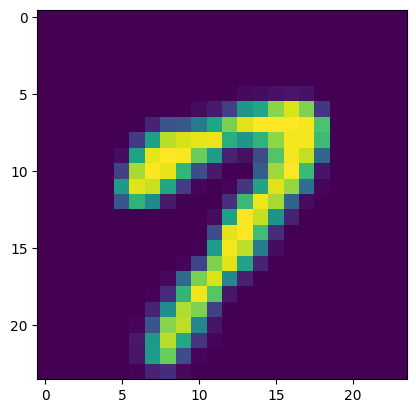

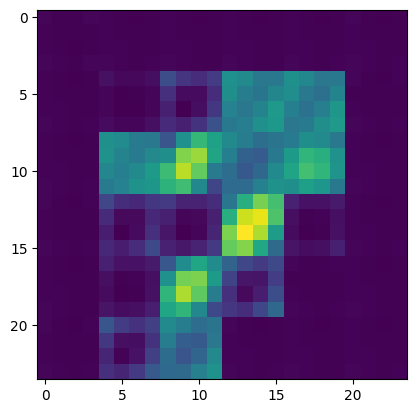

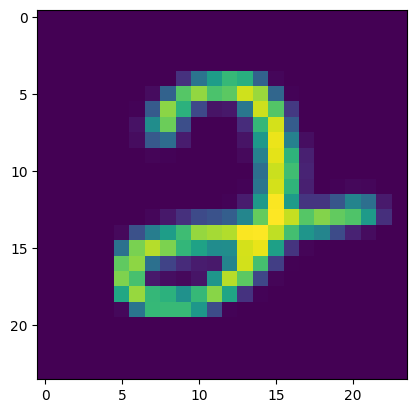

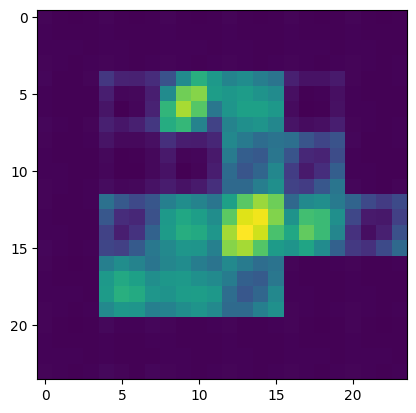

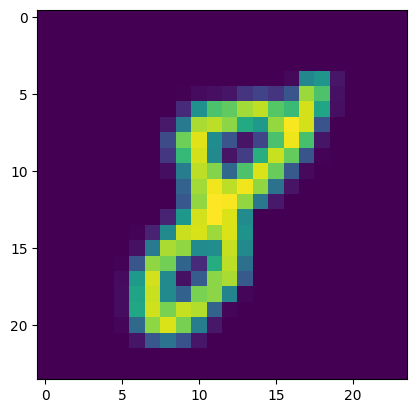

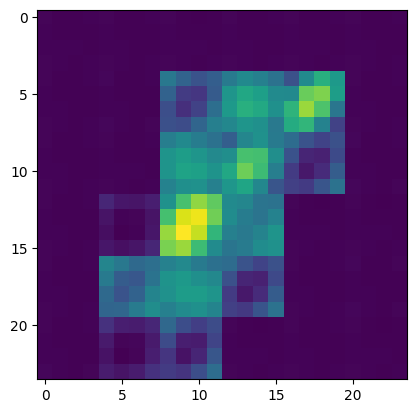

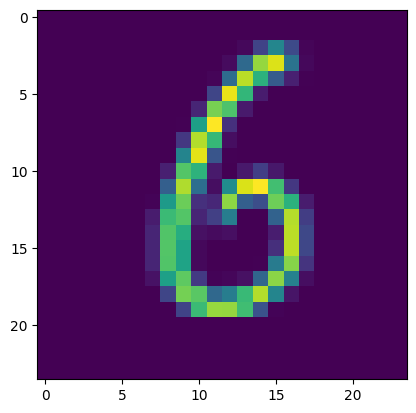

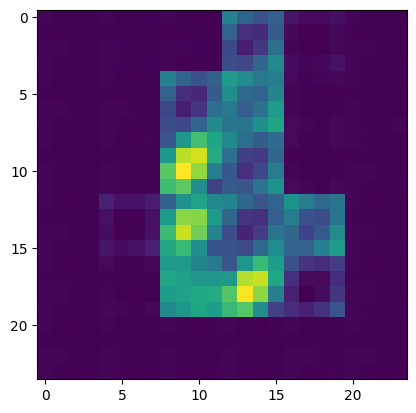

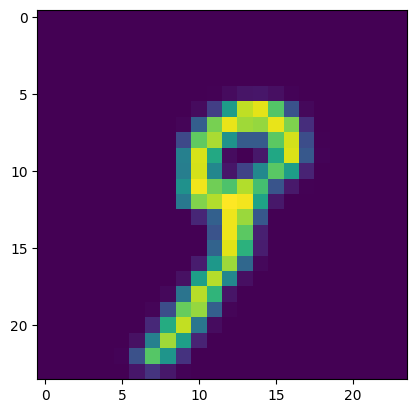

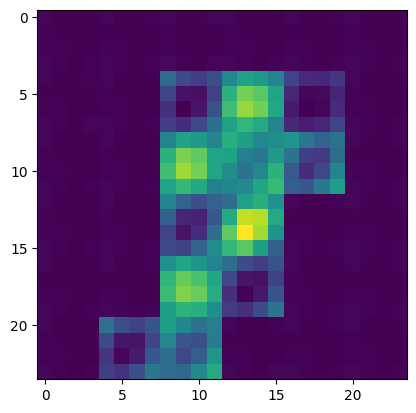

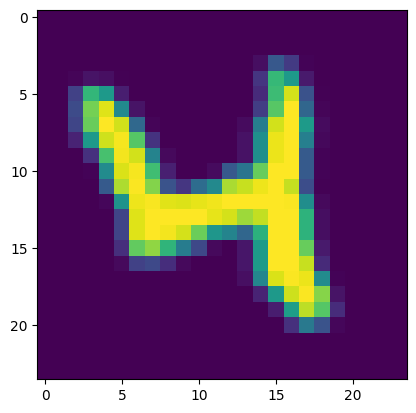

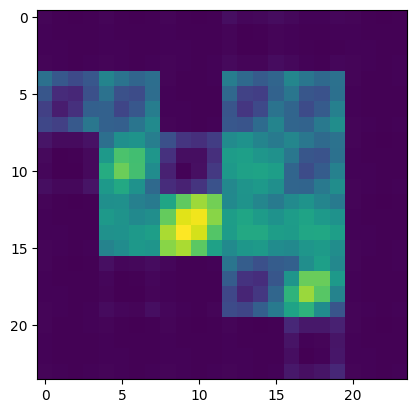

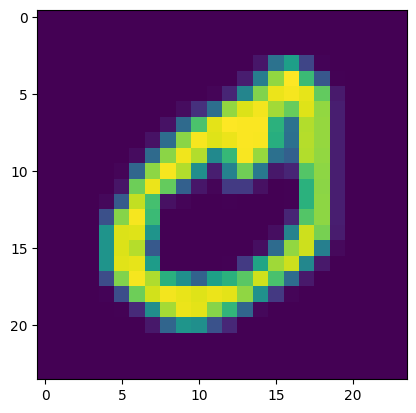

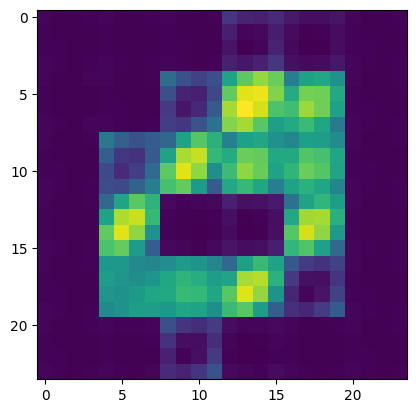

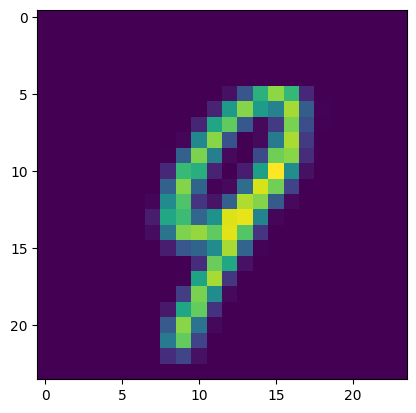

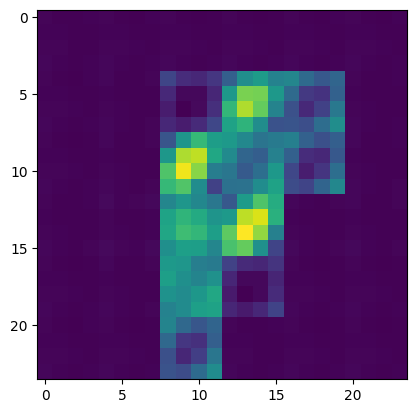

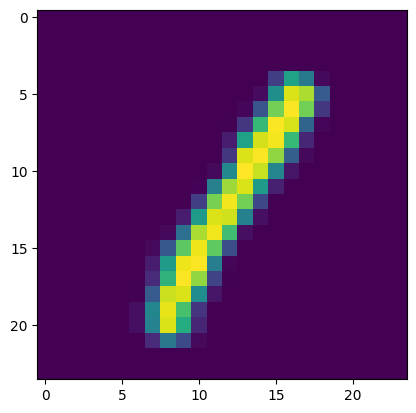

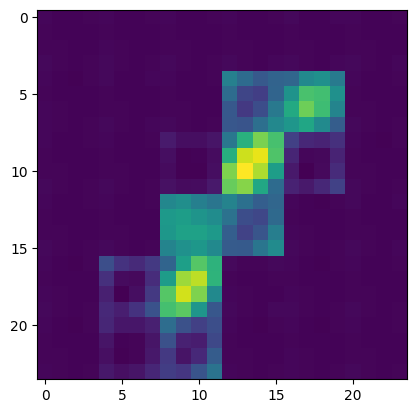

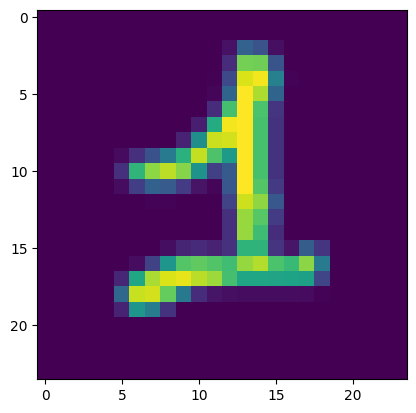

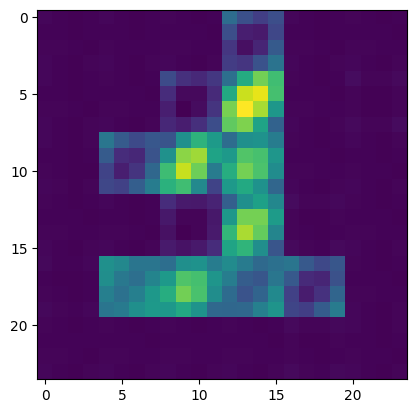

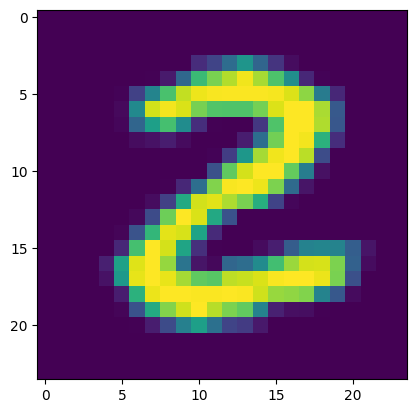

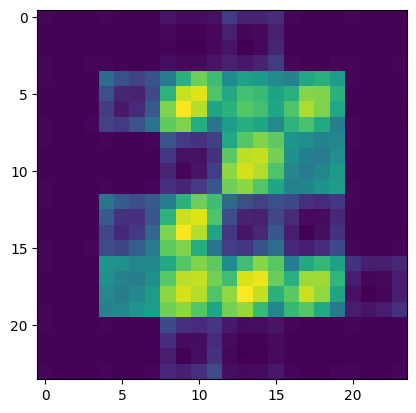

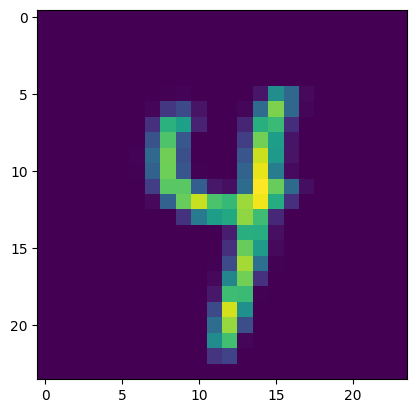

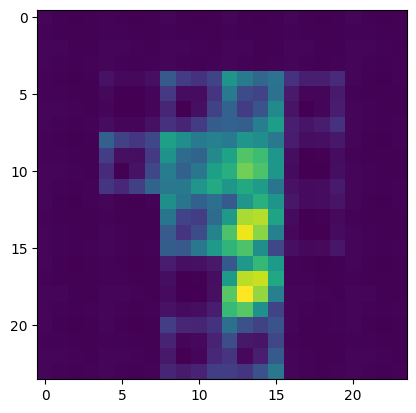

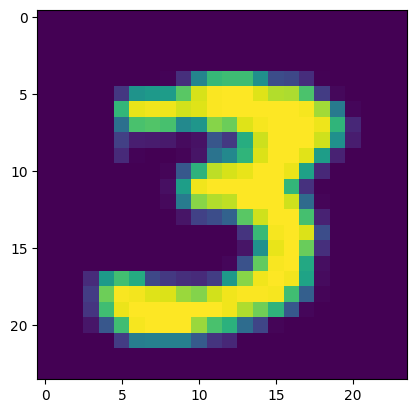

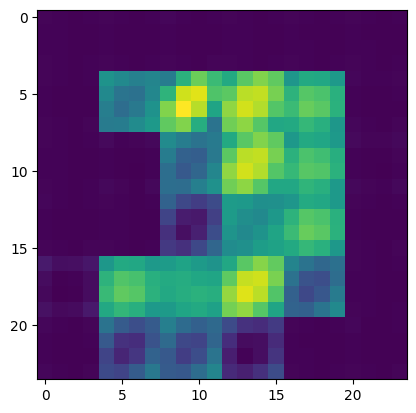

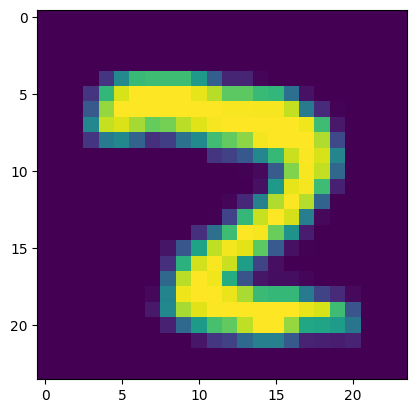

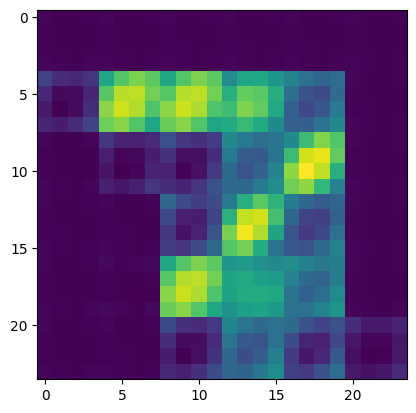

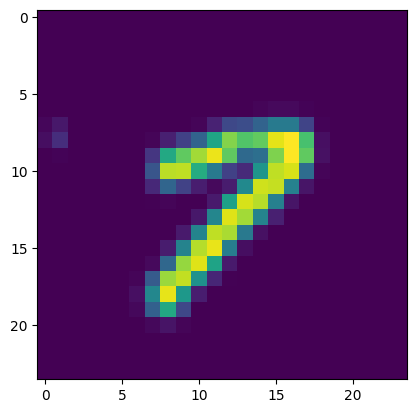

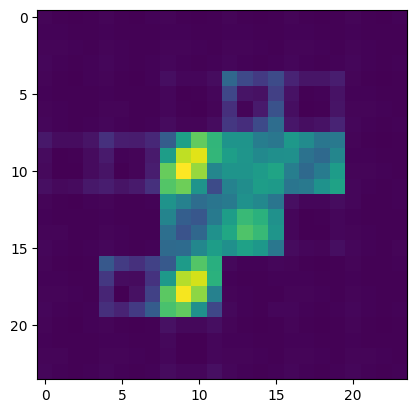

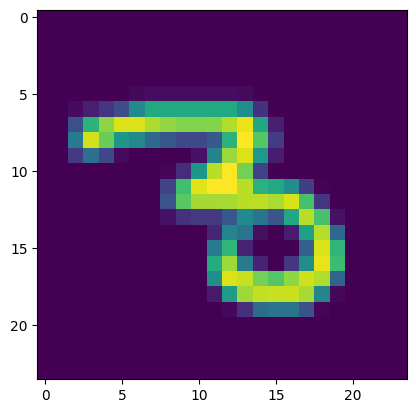

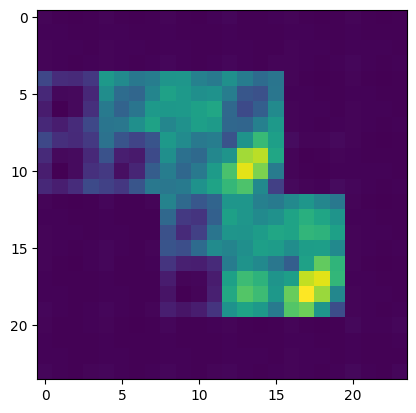

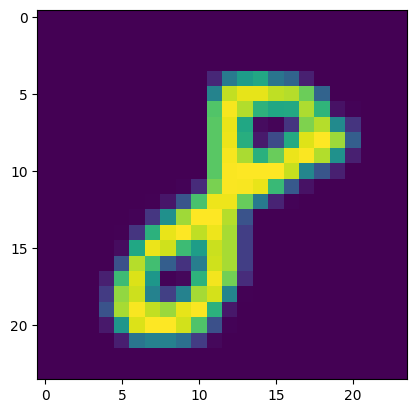

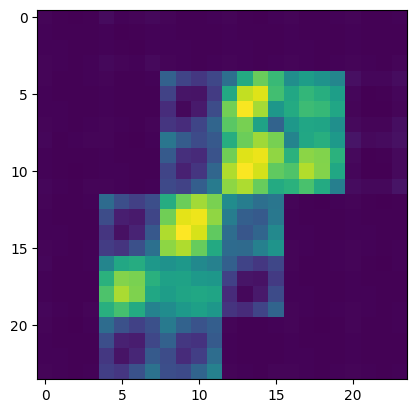

In [52]:
import matplotlib.pyplot as plt

for i in range(32):

    org = restore_tensor(batches[0].node_features, 32, 1, 24, 24, 4)
    pred = restore_tensor(b[0].node_features, 32, 1, 24, 24, 4)

    plt.imshow(org[i].reshape(24, 24, 1).detach().numpy())
    plt.show()

    plt.imshow(pred[i].reshape(24, 24, 1).detach().numpy())
    plt.show()

In [113]:
batches[0].properties

tensor([36., 36., 36., 36., 36., 36., 36., 36., 36., 36., 36., 36., 36., 36.,
        36., 36., 36., 36., 36., 36., 36., 36., 36., 36., 36., 36., 36., 36.,
        36., 36., 36., 36.])

In [68]:
c = torch.load('run0/epoch=0-val_loss=nan-v18.ckpt')

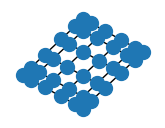

In [206]:
import matplotlib.pyplot as plt
import networkx as nx


options = {"node_color": "C0", "node_size": 100}

G = nx.grid_2d_graph(6, 6)
plt.subplot(332)
nx.draw_spectral(G, **options)

# G.remove_edge((2, 2), (2, 3))
# plt.subplot(334)
# nx.draw_spectral(G, **options)

# G.remove_edge((3, 2), (3, 3))
# plt.subplot(335)
# nx.draw_spectral(G, **options)

# G.remove_edge((2, 2), (3, 2))
# plt.subplot(336)
# nx.draw_spectral(G, **options)

# G.remove_edge((2, 3), (3, 3))
# plt.subplot(337)
# nx.draw_spectral(G, **options)

# G.remove_edge((1, 2), (1, 3))
# plt.subplot(338)
# nx.draw_spectral(G, **options)


In [212]:
np.array(list(nx.spectral_layout(G, dim=2).values()))

array([[-1.00000000e+00, -2.49914553e-01],
       [-8.66025404e-01, -8.67090516e-02],
       [-6.33974596e-01,  1.95971169e-01],
       [-3.66025404e-01,  5.22382172e-01],
       [-1.33974596e-01,  8.05062393e-01],
       [-7.25634033e-15,  9.68267895e-01],
       [-8.66025404e-01, -3.46155652e-01],
       [-7.32050808e-01, -1.82950151e-01],
       [-5.00000000e-01,  9.97300703e-02],
       [-2.32050808e-01,  4.26141074e-01],
       [-4.74046582e-15,  7.08821294e-01],
       [ 1.33974596e-01,  8.72026796e-01],
       [-6.33974596e-01, -5.12850125e-01],
       [-5.00000000e-01, -3.49644624e-01],
       [-2.67949192e-01, -6.69644027e-02],
       [-2.68279820e-15,  2.59446600e-01],
       [ 2.32050808e-01,  5.42126821e-01],
       [ 3.66025404e-01,  7.05332323e-01],
       [-3.66025404e-01, -7.05332323e-01],
       [-2.32050808e-01, -5.42126821e-01],
       [-4.42582328e-16, -2.59446600e-01],
       [ 2.67949192e-01,  6.69644027e-02],
       [ 5.00000000e-01,  3.49644624e-01],
       [ 6.

In [191]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.manifold import SpectralEmbedding

# Step 1: Create a grid graph (e.g., 5x5)
n = 6
G = nx.grid_2d_graph(n, n)  # Creates a 5x5 grid graph

# Step 2: Convert to an adjacency matrix
A = nx.to_numpy_array(G)

# Step 3: Apply Spectral Embedding (2D embedding)
embedding = SpectralEmbedding(n_components=2, affinity="precomputed")
node_positions = embedding.fit_transform(A)

def plot_graph(G, node_positions):

    node_to_index = {node: i for i, node in enumerate(G.nodes())}
    edges_indexed = [(node_to_index[u], node_to_index[v]) for u, v in G.edges()]

    # Step 4: Visualize the results
    plt.figure(figsize=(6, 6))
    for i, (x, y) in enumerate(node_positions):
        plt.scatter(x, y, color="blue")
        plt.text(x, y, str(i), fontsize=12, ha="center", va="center")

    # Draw edges
    for edge in edges_indexed:
        i, j = edge
        plt.plot(
            [node_positions[i][0], node_positions[j][0]],
            [node_positions[i][1], node_positions[j][1]],
            "gray",
        )


In [231]:
from sklearn.manifold import SpectralEmbedding

class SklearnSpectralEmbedding(nn.Module):

    def __init__(
        self, 
        d_model: int, 
        grid_size: int, dropout: float = 0.1, **kwargs):
        super().__init__()
        self.dropout = nn.Dropout(p=dropout)
        self.G = nx.grid_2d_graph(grid_size, grid_size)
        self.A = nx.to_numpy_array(self.G)
        transformation = SpectralEmbedding(
            n_components=d_model,
            affinity="precomputed", **kwargs)
        sorted_eigenvecs = transformation.fit_transform(A)
        sorted_eigenvecs = torch.tensor(sorted_eigenvecs)
        
        self.register_buffer('sorted_eigenvecs', sorted_eigenvecs)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        
        batch, _, _ = x.shape
        embbeding = torch.tile(self.sorted_eigenvecs, (batch, 1, 1)) 
        return embbeding
        x = x + embbeding
        return self.dropout(x)

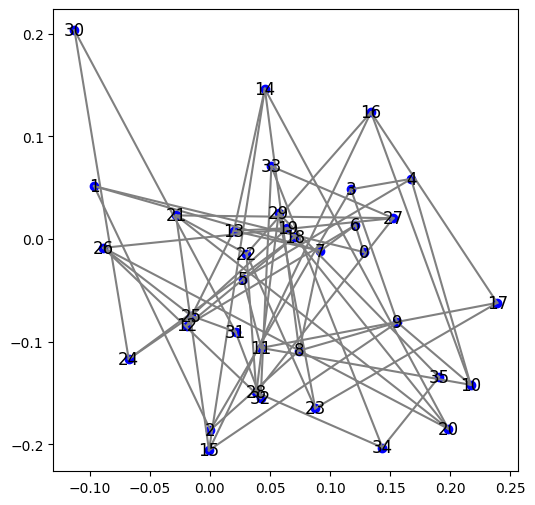

In [233]:
cse = CustomSpectralEmbedding(
    d_model=2,
    grid_size=6,
    dropout=0
)
test = vals[0].node_features
G = cse.G
node_positions = cse(test)
node_positions = node_positions[0].detach().numpy()
plot_graph(G, node_positions)

In [234]:
node_positions

array([[ 0.12798077, -0.01274542],
       [-0.09635831,  0.0515018 ],
       [ 0.00037532, -0.1861217 ],
       [ 0.11730108,  0.04841044],
       [ 0.16736606,  0.0585825 ],
       [ 0.02774146, -0.03879388],
       [ 0.12097233,  0.01350818],
       [ 0.09186958, -0.01163522],
       [ 0.07432906, -0.10872988],
       [ 0.15589789, -0.08118948],
       [ 0.21692027, -0.14204201],
       [ 0.04259997, -0.10612652],
       [-0.01909827, -0.08432005],
       [ 0.01990658,  0.00794914],
       [ 0.04571244,  0.14631386],
       [-0.00077147, -0.20584007],
       [ 0.13400742,  0.12351584],
       [ 0.23897932, -0.06217779],
       [ 0.07043056,  0.00202815],
       [ 0.064462  ,  0.01058616],
       [ 0.19834584, -0.18497893],
       [-0.02819288,  0.02299324],
       [ 0.03041784, -0.0145402 ],
       [ 0.08758196, -0.16494432],
       [-0.06752576, -0.11701664],
       [-0.01534864, -0.07487932],
       [-0.0885357 , -0.00861694],
       [ 0.1525193 ,  0.02029355],
       [ 0.03863969,

In [236]:
nse = NetworkXSpectralEmbedding(
    d_model=16,
    grid_size=6,
    dropout=0
)
test = vals[0].node_features
G = nse.G
node_positions = nse(test)
node_positions = node_positions[0].detach().numpy()
# plot_graph(G, node_positions)

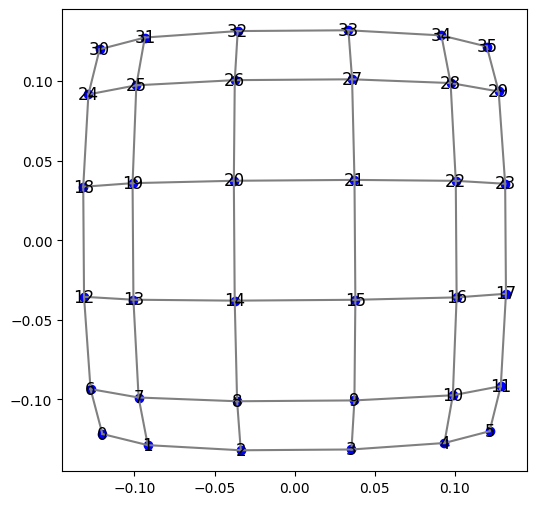

In [232]:
sse = SklearnSpectralEmbedding(
    d_model=2,
    grid_size=6,
    dropout=0
)
test = vals[0].node_features
G = sse.G
node_positions = sse(test)
node_positions = node_positions[0].detach().numpy()
plot_graph(G, node_positions)

In [269]:
from torch.nn.functional import relu, pad
vals[0].node_features
node_features = pad(vals[0].node_features, (0, 1, 1, 0))
# edge_features = pad(edge_features, (0, 1, 1, 0, 1, 0))
# edge_features[:, 0, :, edge_dim] = 1
# edge_features[:, :, 0, edge_dim] = 1
# mask = pad(mask, (1, 0), value=1)
# return node_features, edge_features, mask

In [274]:
node_features[0].shape

torch.Size([37, 17])

In [272]:
vals[0].node_features.shape

torch.Size([32, 36, 16])

In [281]:
a = torch.tensor([
    [[1, 2, 3], [4,5, 6]],
    [[10, 20, 30], [40,50, 60]]])

In [310]:
node_features = pad(a, (0, 1, 1, 0))
m = torch.tensor([[True, True], [True, True]])
m = pad(m, (1, 0), value=0)

In [311]:
edge_mask = m.unsqueeze(1) * m.unsqueeze(2)

In [312]:
edge_mask

tensor([[[False, False, False],
         [False,  True,  True],
         [False,  True,  True]],

        [[False, False, False],
         [False,  True,  True],
         [False,  True,  True]]])

In [288]:
node_features_combined = torch.cat(
            (node_features.unsqueeze(2).repeat(1, 1, 3, 1),
             node_features.unsqueeze(1).repeat_interleave(3, dim=1)),
            dim=-1)

In [289]:
node_features_combined

tensor([[[[ 0,  0,  0,  0,  0,  0,  0,  0],
          [ 0,  0,  0,  0,  1,  2,  3,  0],
          [ 0,  0,  0,  0,  4,  5,  6,  0]],

         [[ 1,  2,  3,  0,  0,  0,  0,  0],
          [ 1,  2,  3,  0,  1,  2,  3,  0],
          [ 1,  2,  3,  0,  4,  5,  6,  0]],

         [[ 4,  5,  6,  0,  0,  0,  0,  0],
          [ 4,  5,  6,  0,  1,  2,  3,  0],
          [ 4,  5,  6,  0,  4,  5,  6,  0]]],


        [[[ 0,  0,  0,  0,  0,  0,  0,  0],
          [ 0,  0,  0,  0, 10, 20, 30,  0],
          [ 0,  0,  0,  0, 40, 50, 60,  0]],

         [[10, 20, 30,  0,  0,  0,  0,  0],
          [10, 20, 30,  0, 10, 20, 30,  0],
          [10, 20, 30,  0, 40, 50, 60,  0]],

         [[40, 50, 60,  0,  0,  0,  0,  0],
          [40, 50, 60,  0, 10, 20, 30,  0],
          [40, 50, 60,  0, 40, 50, 60,  0]]]])

In [317]:
for name, param in model.named_parameters():
    if 'weight' in name and param.data.dim() == 2:
        # print(param.data.dim())
        # print(name)
        pass
    else:
        print(name)

graph_ae.encoder.graph_transformer.self_attn_layers.0.layer_norm.weight
graph_ae.encoder.graph_transformer.self_attn_layers.0.layer_norm.bias
graph_ae.encoder.graph_transformer.self_attn_layers.1.layer_norm.weight
graph_ae.encoder.graph_transformer.self_attn_layers.1.layer_norm.bias
graph_ae.encoder.graph_transformer.self_attn_layers.2.layer_norm.weight
graph_ae.encoder.graph_transformer.self_attn_layers.2.layer_norm.bias
graph_ae.encoder.graph_transformer.self_attn_layers.3.layer_norm.weight
graph_ae.encoder.graph_transformer.self_attn_layers.3.layer_norm.bias
graph_ae.encoder.graph_transformer.pff_layers.0.w_1.bias
graph_ae.encoder.graph_transformer.pff_layers.0.w_2.bias
graph_ae.encoder.graph_transformer.pff_layers.0.layer_norm.weight
graph_ae.encoder.graph_transformer.pff_layers.0.layer_norm.bias
graph_ae.encoder.graph_transformer.pff_layers.1.w_1.bias
graph_ae.encoder.graph_transformer.pff_layers.1.w_2.bias
graph_ae.encoder.graph_transformer.pff_layers.1.layer_norm.weight
graph_ae

In [325]:
b[0].properties

tensor([35.9233, 35.8828, 35.9139, 35.8736, 35.9277, 35.9012, 35.9003, 35.9171,
        35.9402, 35.9034, 35.9300, 35.9181, 35.8675, 35.9352, 35.9054, 35.9183,
        35.9368, 35.9326, 35.9178, 35.8857, 35.9127, 35.8913, 35.9199, 35.9105,
        35.9050, 35.9264, 35.8673, 35.8834, 35.8982, 35.8980, 35.8946, 35.9119],
       grad_fn=<SqueezeBackward0>)

In [323]:
b[0]

DenseGraphBatch(node_features=[32, 36, 16], edge_features=[0], mask=[32, 36], properties=[32])